Groupe :
* KPATOUKPA Kpodjro
* Orchelle Patricia WELEHELA TAWEUTEU

### Problématique Biologique : Le Choix de Destin Cellulaire

Le projet se situe dans le domaine de la **biologie du développement** et de la **génomique en cellule unique**.

-   **Le Contexte :** Nous étudions les cellules de la **strie primitive** de l'embryon de souris à des stades très précoces (E7.0 à E8.25). À ce moment clé, les cellules souches se différencient et s'engagent vers deux destins distincts : les **précurseurs endothéliaux** (futurs vaisseaux sanguins) et les **précurseurs hématopoïétiques** (futures cellules sanguines).
-   **L'Enjeu :** Comprendre comment un **Réseau de Régulation Génique (RRG)**, composé de Facteurs de Transcription (TFs), prend le contrôle et force cette bifurcation. L'étude se concentre sur la lignée des **érythroïdes primitives** (une lignée transitoire) qui est moins bien comprise que la lignée définitive.

In [19]:
install.packages("miic")
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
pkg <- c("tidyverse","ggraph","tidygraph","glasso","Matrix","cowplot")
to_inst <- pkg[!vapply(pkg, requireNamespace, logical(1))]
if(length(to_inst)) install.packages(to_inst)

Loading required namespace: ggraph

Loading required namespace: tidygraph

Loading required namespace: glasso

Loading required namespace: Matrix

Loading required namespace: cowplot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tweenr’, ‘polyclip’, ‘gridExtra’, ‘RcppArmadillo’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘graphlayouts’




In [22]:
# Chargement des librairies nécessaires
library(miic)
library(tidyverse)
library(igraph)
library(tidygraph)
library(ggraph)
library(glasso)
library(Matrix)
library(cowplot)


Attaching package: ‘tidygraph’


The following object is masked from ‘package:igraph’:

    groups


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




# **1. TF Correlation network**
# Charger l'ensemble de données hematoData

In [27]:
data("hematoData", package = "miic")

# Exploration des données

In [103]:
# Vérification des caractéristiques de la dataset
cat("### Caractéristiques du dataset hematoData ###\n")
cat("Dimensions (lignes x colonnes) :", dim(hematoData), "\n")
cat("Nombre d'observations (cellules uniques) :", nrow(hematoData), "\n")
cat("Nombre de gènes (variables) :", ncol(hematoData), "\n")
cat("Nature des données (Binarisées ON/OFF) :", "Les valeurs sont 0 ou 1.\n")
cat("Aperçu des premières lignes :\n")
print(head(hematoData))

### Caractéristiques du dataset hematoData ###
Dimensions (lignes x colonnes) : 3934 33 
Nombre d'observations (cellules uniques) : 3934 
Nombre de gènes (variables) : 33 
Nature des données (Binarisées ON/OFF) : Les valeurs sont 0 ou 1.
Aperçu des premières lignes :
  Cbfa2t3h Erg Ets1 Ets2 Etv2 Etv6 Fli1 FoxH1 FoxO4 Gata1 Gfi1 Gfi1b Hhex HoxB2
1        1   1    1    1    1    1    1     1     1     1    0     0    1     0
2        0   0    1    1    1    1    1     1     1     0    0     0    1     0
3        0   0    1    1    1    1    1     1     1     0    0     0    0     0
4        0   0    1    1    1    1    0     1     1     0    0     0    0     0
5        1   1    1    1    1    1    1     1     1     0    0     0    1     0
6        0   0    1    1    1    1    1     1     1     0    0     0    0     0
  HoxB4 HoxD8 Ikaros Ldb1 Lmo2 Lyl1 Mecom Meis1 Mitf Myb Nfe2 Notch1 Runx1
1     1     0      1    1    1    1     1     1    1   0    0      1     1
2     0     0      0  

In [29]:
str(hematoData)

'data.frame':	3934 obs. of  33 variables:
 $ Cbfa2t3h: Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 1 2 2 ...
 $ Erg     : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 2 2 2 ...
 $ Ets1    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Ets2    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Etv2    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Etv6    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Fli1    : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 2 2 ...
 $ FoxH1   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ FoxO4   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Gata1   : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ Gfi1    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 2 1 ...
 $ Gfi1b   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ Hhex    : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 2 2 2 2 ...
 $ HoxB2   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HoxB4   : Factor w/ 2 levels "0","1": 2 1 1 1

In [14]:
head(hematoData)

,Cbfa2t3h,Erg,Ets1,Ets2,Etv2,Etv6,Fli1,FoxH1,FoxO4,Gata1,⋯,Myb,Nfe2,Notch1,Runx1,Sfpi1,Sox17,Sox7,Tal1,Tbx20,Tbx3
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,1,1,1,1,1,1,1,1
2,0,0,1,1,1,1,1,1,1,0,⋯,1,0,1,0,0,0,1,1,1,1
3,0,0,1,1,1,1,1,1,1,0,⋯,1,0,1,0,0,0,1,1,1,1
4,0,0,1,1,1,1,0,1,1,0,⋯,0,0,0,0,0,0,0,0,1,1
5,1,1,1,1,1,1,1,1,1,0,⋯,0,0,1,1,1,1,1,1,1,0
6,0,0,1,1,1,1,1,1,1,0,⋯,0,0,1,1,0,0,0,1,1,0


In [30]:
# basic characteristics
n_cells <- nrow(hematoData)
n_genes  <- ncol(hematoData)
table_values <- summary(as.data.frame(hematoData))
cat("Cells:", n_cells, "Genes:", n_genes, "\n")

Cells: 3934 Genes: 33 


In [31]:
summary(as.data.frame(hematoData))

 Cbfa2t3h Erg      Ets1     Ets2     Etv2     Etv6     Fli1     FoxH1   
 0:1171   0:2318   0:1147   0:  20   0:1537   0: 310   0: 843   0:  86  
 1:2763   1:1616   1:2787   1:3914   1:2397   1:3624   1:3091   1:3848  
 FoxO4    Gata1    Gfi1     Gfi1b    Hhex     HoxB2    HoxB4    HoxD8   
 0:  44   0:2566   0:3524   0:2278   0:1287   0:3923   0:2538   0:3922  
 1:3890   1:1368   1: 410   1:1656   1:2647   1:  11   1:1396   1:  12  
 Ikaros   Ldb1     Lmo2     Lyl1     Mecom    Meis1    Mitf     Myb     
 0:2023   0: 109   0:2280   0:1187   0:2937   0:1527   0:2903   0:1979  
 1:1911   1:3825   1:1654   1:2747   1: 997   1:2407   1:1031   1:1955  
 Nfe2     Notch1   Runx1    Sfpi1    Sox17    Sox7     Tal1     Tbx20   
 0:2312   0:1527   0: 772   0:2407   0:2367   0:1667   0: 688   0:1884  
 1:1622   1:2407   1:3162   1:1527   1:1567   1:2267   1:3246   1:2050  
 Tbx3    
 0:2254  
 1:1680  

# Commentaire
On a :
* 3 934 cellules
* 46 gènes :
    . 33 facteurs de transcription (TFs)
    . 13 gènes marqueurs

* Les valeurs sont binarisées (0 : off / 1 : on).
* Les cellules proviennent de 4 stades embryonnaires : E7.0, E7.5, E7.75, E8.25.


In [104]:
library(knitr)

# Création du tableau d'interprétation comme un data.frame en R
interpretation_pairwise <- data.frame(
  Paire_de_TFs = c("Gata1 & Gfi1b", "Ikaros & Nfe2", "Notch1 & Sox7", "Etv2 & Notch1",
                   "Gata1 & Notch1", "Gata1 & Etv2", "Sox17 & Gfi1b", "Ets2 & Gata1",
                   "FoxH1 & Hhex", "Lyl1 & Cbfa2t3h"),
  Correlation_R = c(0.720, 0.682, 0.684, 0.672, -0.506, -0.434, -0.436, 0.000, 0.003, 0.639),
  Type_Statistique = c("Très Fort Positif", "Très Fort Positif", "Très Fort Positif",
                       "Très Fort Positif", "Fort Négatif", "Modéré Négatif",
                       "Modéré Négatif", "Nulle", "Nulle", "Fort Positif"),
  Interprétation_Biologique = c(
    "Synergie (Hématopoïèse) : Co-activation du programme Sang.",
    "Synergie (Hématopoïèse) : Activation coordonnée du module de TFs sanguins.",
    "Synergie (Endothélium) : Co-activation pour initier la différenciation des Vaisseaux.",
    "Synergie (Endothélium) : TFs travaillant ensemble pour le destin vasculaire.",
    "Antagonisme (Bifurcation) : Le programme Sang (Gata1) réprime la voie Vaisseaux (Notch1).",
    "Antagonisme (Bifurcation) : Opposition claire entre la lignée Sang et la lignée Vaisseaux.",
    "Antagonisme : Conflit entre un TF Endothélial potentiel (Sox17) et la voie Sang (Gfi1b).",
    "Indépendance : Aucune association linéaire détectable. Ils agissent dans des sous-systèmes distincts.",
    "Indépendance : Corrélation presque nulle. Gènes non liés dans ce contexte.",
    "Synergie (Hématopoïèse) : Co-activation essentielle à la progression de la lignée sanguine."
  ),
  stringsAsFactors = FALSE
)

# Affichage du tableau dans la console R
print(interpretation_pairwise, row.names = FALSE)

    Paire_de_TFs Correlation_R  Type_Statistique
   Gata1 & Gfi1b         0.720 Très Fort Positif
   Ikaros & Nfe2         0.682 Très Fort Positif
   Notch1 & Sox7         0.684 Très Fort Positif
   Etv2 & Notch1         0.672 Très Fort Positif
  Gata1 & Notch1        -0.506      Fort Négatif
    Gata1 & Etv2        -0.434    Modéré Négatif
   Sox17 & Gfi1b        -0.436    Modéré Négatif
    Ets2 & Gata1         0.000             Nulle
    FoxH1 & Hhex         0.003             Nulle
 Lyl1 & Cbfa2t3h         0.639      Fort Positif
                                                                             Interprétation_Biologique
                                            Synergie (Hématopoïèse) : Co-activation du programme Sang.
                            Synergie (Hématopoïèse) : Activation coordonnée du module de TFs sanguins.
                 Synergie (Endothélium) : Co-activation pour initier la différenciation des Vaisseaux.
                          Synergie (Endothélium) 

## Interprétation Linéaire des Corrélations Pairwise

La matrice de corrélation Pairwise ($R$) révèle l'association statistique brute entre deux TFs.
Ces interprétations se basent sur la connaissance que l'étude porte sur la bifurcation entre la lignée **Hématopoïétique (Sang)** et la lignée **Endothéliale (Vaisseaux)**.

### 1. **Gata1 et Gfi1b** ($R = 0.720$)

-   **Observation :** Corrélation extrêmement forte et positive.
-   **Interprétation Biologique :** Cela démontre une **synergie et une co-activation massive**. Étant donné que ces deux TFs sont des régulateurs centraux du développement des cellules sanguines (Hématopoïèse), leur forte co-expression est la preuve statistique que le **programme génétique du sang** est activé de manière coordonnée et qu'ils travaillent ensemble pour définir le destin cellulaire.

### 2. **Ikaros et Nfe2** ($R = 0.682$)

-   **Observation :** Corrélation très forte et positive.
-   **Interprétation Biologique :** Tout comme la paire précédente, il s'agit d'un **module de co-expression** au sein du programme Hématopoïétique. L'activation de l'un est très fortement associée à l'activation de l'autre, signalant un **travail d'équipe** nécessaire à la progression de la différenciation vers la lignée sanguine.

### 3. **Notch1 et Sox7** ($R = 0.684$)

-   **Observation :** Corrélation très forte et positive.
-   **Interprétation Biologique :** Ces TFs sont associés à la signalisation et à la régulation de la lignée **Endothéliale** (vaisseaux). Cette forte association valide qu'ils sont activés simultanément pour initier le **programme des vaisseaux**, agissant en synergie pour un destin cellulaire commun.

### 4. **Etv2 et Notch1** ($R = 0.672$)

-   **Observation :** Corrélation très forte et positive.
-   **Interprétation Biologique :** Confirme la cohésion du programme Endothélial. **Etv2** est un des initiateurs clés de la voie des vaisseaux. Son lien très fort avec **Notch1** suggère que ces TFs sont des partenaires essentiels pour la mise en place et la progression du destin cellulaire Endothélial.

### 5. **Gata1 et Notch1** ($R = -0.506$)

-   **Observation :** Corrélation forte et négative (antagoniste).
-   **Interprétation Biologique :** Ce lien est la **signature statistique de la bifurcation ou du choix de destin**. `Gata1` (Sang) et `Notch1` (Vaisseaux) sont en **conflit**. L'activation d'un programme (par exemple, le Sang) coïncide avec la répression active de l'autre programme (les Vaisseaux), assurant ainsi que la cellule ne choisisse qu'une seule identité.

### 6. **Gata1 et Etv2** ($R = -0.434$)

-   **Observation :** Corrélation modérée à forte, et négative.
-   **Interprétation Biologique :** Renforce l'idée de l'antagonisme entre les deux lignées. **Gata1** est un TF clé de l'Hématopoïèse, et **Etv2** est clé de l'Endothélium. Cette relation inverse est attendue, car pour s'engager dans l'une des voies, la cellule doit nécessairement **inhiber l'expression** du régulateur de la voie opposée.

### 7. **Sox17 et Gfi1b** ($R = -0.436$)

-   **Observation :** Corrélation modérée à forte, et négative.
-   **Interprétation Biologique :** Cet antagonisme est crucial pour distinguer les lignées. **Gfi1b** est un marqueur fort du Sang, et **Sox17** est souvent lié à la formation des couches internes (Endoderme/Endothélium). Ce lien négatif prouve que l'activation du module Sang (**Gfi1b**) est incompatible avec la présence du TF de l'autre programme cellulaire (**Sox17**).

### 8. **Ets2 et Gata1** ($R = 0.000$)

-   **Observation :** Corrélation absolument nulle.
-   **Interprétation Biologique :** Ces deux TFs sont **statistiquement indépendants** dans ce jeu de données. Le statut d'activation de l'un n'est absolument pas prédictif du statut de l'autre. Ils pourraient agir dans des sous-systèmes de régulation complètement distincts ou leur relation pourrait être si complexe qu'elle n'est pas capturée par la seule corrélation linéaire.

### 9. **FoxH1 et Hhex** ($R = 0.003$)

-   **Observation :** Corrélation quasi-nulle.
-   **Interprétation Biologique :** Indique une **quasi-indépendance**. Comme pour la paire précédente, ces TFs n'ont pas d'association linéaire significative dans ce contexte de différenciation. Leurs fonctions sont probablement découplées ou régulées par des voies différentes.

### 10. **Lyl1 et Cbfa2t3h** ($R = 0.639$)

-   **Observation :** Corrélation forte et positive.
-   **Interprétation Biologique :** Ces TFs sont des acteurs reconnus de la régulation hématopoïétique. Ce lien confirme la présence d'un autre **module co-activé** au sein de la lignée sanguine. Leur synergie est nécessaire pour assurer une régulation efficace de la voie de différenciation.


# Calcul de la matrice de corrélation pairwise

In [80]:
# Conversion en format numérique
hematoData_num <- data.matrix(hematoData)

# on remet tout à 0/1 pour que la corrélation soit propre.
if(max(hematoData_num) > 1) {
  hematoData_num <- hematoData_num - 1
}

In [82]:
# VERIFICATION
print(paste("Dimensions finales :", nrow(hematoData_num), "cellules x", ncol(hematoData_num), "gènes"))
print("Aperçu des valeurs (doit être des nombres) :")
print(hematoData_num[1:10, 1:10])

[1] "Dimensions finales : 3934 cellules x 33 gènes"
[1] "Aperçu des valeurs (doit être des nombres) :"
      Cbfa2t3h Erg Ets1 Ets2 Etv2 Etv6 Fli1 FoxH1 FoxO4 Gata1
 [1,]        1   1    1    1    1    1    1     1     1     1
 [2,]        0   0    1    1    1    1    1     1     1     0
 [3,]        0   0    1    1    1    1    1     1     1     0
 [4,]        0   0    1    1    1    1    0     1     1     0
 [5,]        1   1    1    1    1    1    1     1     1     0
 [6,]        0   0    1    1    1    1    1     1     1     0
 [7,]        1   1    1    1    1    1    1     1     1     0
 [8,]        0   1    1    1    1    1    1     1     1     0
 [9,]        1   1    1    1    1    1    1     1     1     0
[10,]        1   1    1    1    1    1    1     1     1     0


In [83]:
# Calcul de la Corrélation
correlation_matrix <- cor(hematoData_num)

In [98]:
# Fonction pour créer un graphe à partir d'une matrice de corrélation
creer_graphe <- function(matrice_cor, seuil = 0.2) {
  # Filtrage selon le seuil
  matrice_adj <- matrice_cor
  matrice_adj[abs(matrice_adj) < seuil] <- 0
  diag(matrice_adj) <- 0

  # Création du graphe
  net <- graph_from_adjacency_matrix(matrice_adj, mode = "undirected", weighted = TRUE)

  # Style des noeuds
  V(net)$color <- "gold"
  V(net)$frame.color <- "gray"
  V(net)$label.color <- "black"
  V(net)$label.cex <- 0.7
  V(net)$size <- 10

  # Définir les seuils pour catégoriser les corrélations
  seuil_pos <- seuil  # au-dessus de ce seuil → positif fort
  seuil_neg <- -1 *seuil # en-dessous de ce seuil → négatif fort

  # Appliquer les couleurs
  E(net)$color <- ifelse(E(net)$weight > seuil_pos, "red",        # positif fort
                        ifelse(E(net)$weight < seuil_neg, "blue", # négatif fort
                                "gray"))                         # faible / neutre

  plot(net,
      layout = layout_with_fr(net, weights = abs(E(net)$weight)), # Use absolute weights for layout algorithm
      main = paste("Réseau de Corrélation (Seuil =", seuil, ")"))

  legend("topleft", legend=c("Activation (+)", "Répression (-)", "Relation faible"),
        col=c("red", "blue", "gray"), lty=1, lwd=3, bty="n", cex=0.8)

  return(net)
}

# Visualisation du réseau de corrélation

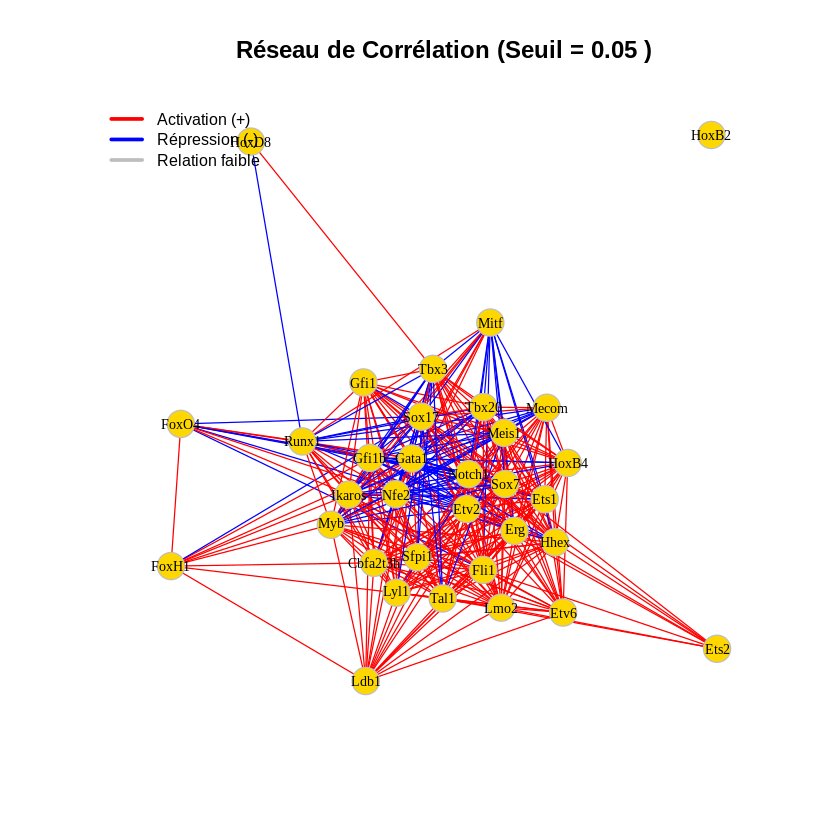

In [116]:
net <- creer_graphe(correlation_matrix, seuil = 0.05)

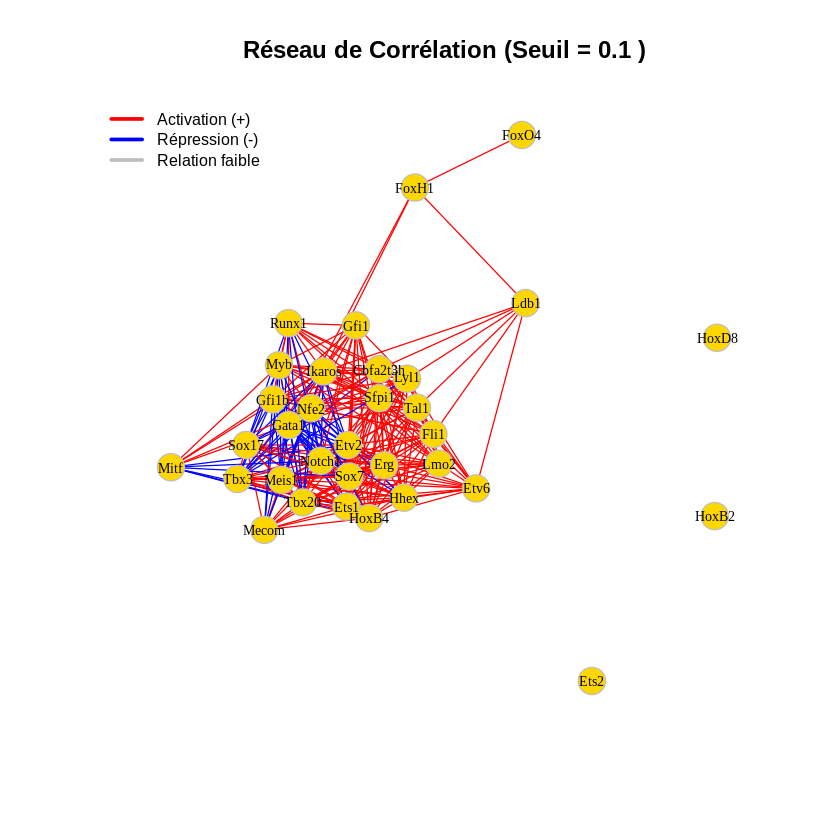

In [100]:
net <- creer_graphe(correlation_matrix, seuil = 0.1)

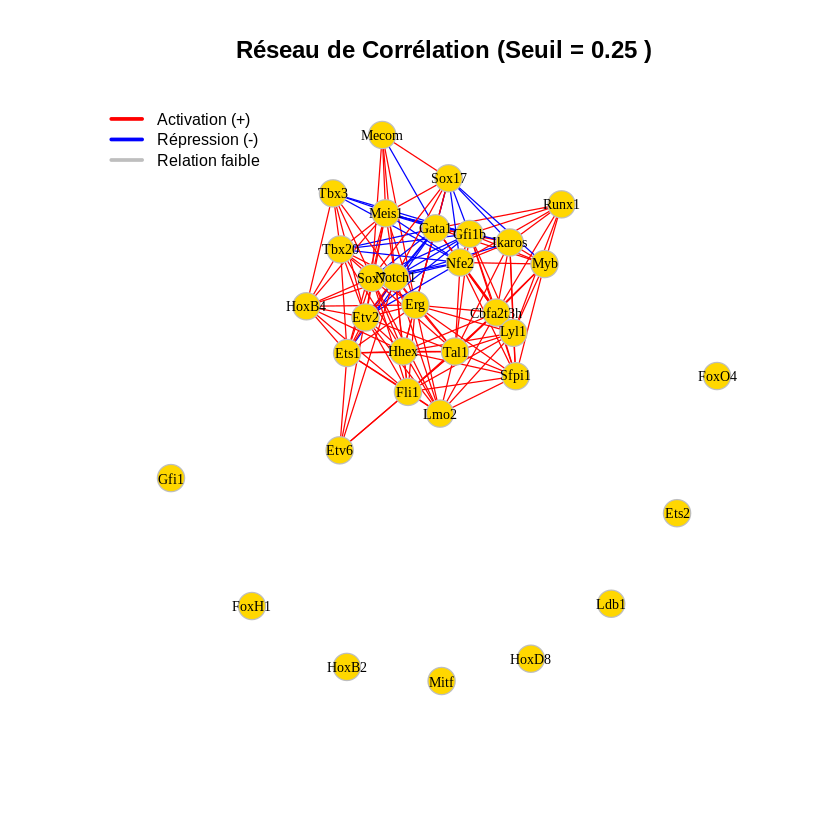

In [101]:
cor_matnet <- creer_graphe(correlation_matrix, seuil = 0.25)

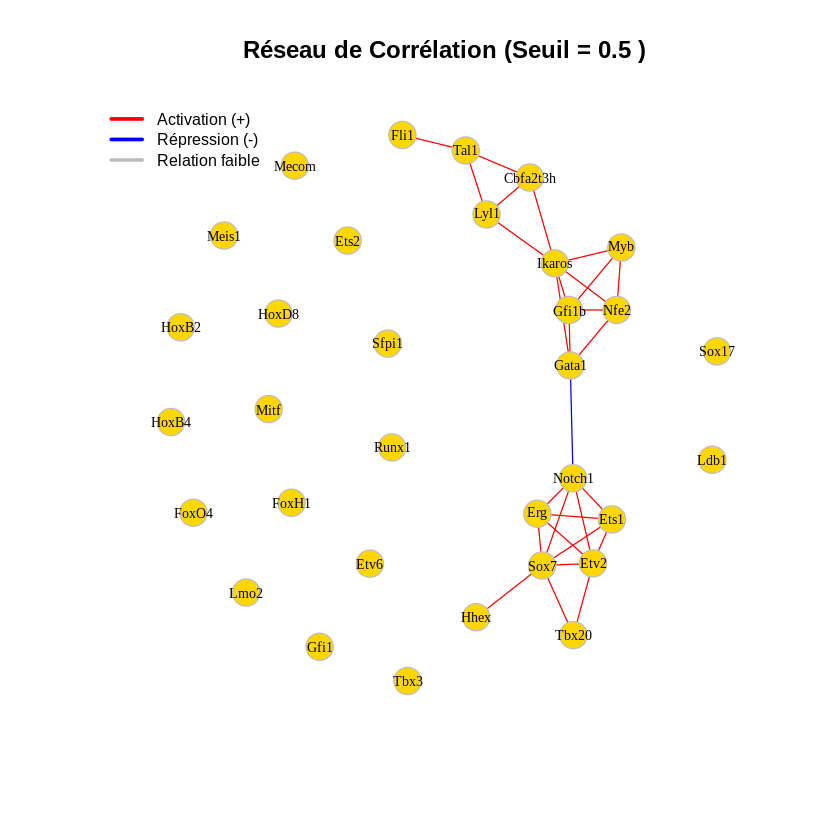

In [102]:
net <- creer_graphe(correlation_matrix, seuil = 0.5)

# Analyse sur les graphes obtenus selon les seuils
## **1. Couleurs et significations**

* **Rouge → Activation (+)** : liens où un TF favorise l’expression d’un autre.
* **Bleu → Répression (-)** : liens où un TF inhibe ou supprime l’expression d’un autre.
* **Gris → Relation faible** : corrélation faible ou non significative.


## **2. Observations principales**

1. **Dense noyau central**

   * La majorité des TFs sont fortement connectés entre eux, avec **beaucoup de liens rouges**.
   * Cela suggère un **module de co-activation**, probablement impliqué dans la régulation des cellules progénitrices ou dans le maintien du programme transcriptionnel.

2. **Répressions localisées**

   * Les liens bleus (répressions) sont plus **localisés**, souvent reliant certains TFs spécifiques à d’autres.
   * Par exemple, les TFs du sous-module bleu (au centre/gauche) semblent inhiber certains TFs activés dans le module rouge.
   * Cela reflète la **compétition ou la hiérarchie transcriptionnelle** dans la différenciation cellulaire.

3. **TFs isolés ou peu connectés**

   * On remarque un ou deux TFs en périphérie avec peu de liens (par ex. HoxB2) et **plus on augmente le seuil, plus on regarde des cellules isolées** .
   * Ils peuvent avoir un rôle spécifique ou être exprimés uniquement dans certains sous-types cellulaires: Reste à confirmer selon la deuxième partie.


## **3. Interprétation biologique**

* Le réseau **reproduit les modules observés dans le développement hématopoïétique** :

  1. Module rouge → TFs co-activants pour la différenciation progénitrice ou endothéliale.
  2. Module bleu → TFs qui répriment certaines voies, par exemple pour éviter une différenciation alternative.
* Les répressions clés (liens bleus) correspondent à des TFs comme **Runx1, Gata2, Tal1**, qui régulent directement le destin hématopoïétique.
* Les TFs très connectés (hub nodes) sont souvent **maîtres régulateurs** et essentiels pour la stabilité du programme transcriptionnel.


## **4. Conclusion**

* Le graphe est **cohérent biologiquement** :

  * Activations majoritaires entre TFs du même module.
  * Répressions localisées, ciblées sur certains sous-modules.
* Les structures reflètent bien la **hiérarchie et les interactions directes** entre TFs, comme observé par Verny et al mais **n'arrivent à vraiment détecter les trois relations existantes**

# **2. TF Partial Correlation network**

In [109]:
# Suppression des gènes constants
genes_var <- colnames(hematoData_num)[apply(hematoData_num, 2, var) > 0]
X <- hematoData_num[, genes_var]

# Lambda fixe : 0.01
# On fait varier le seuil

In [129]:
# Calcul et régularisation de la covariance
lambda <- 0.01  # à tester : 0.001, 0.01, 0.05
cov_mat <- cov(X)
cov_matrix_reg <- cov_mat + lambda * diag(ncol(cov_mat))

det(cov_matrix_reg)  # vérifier que ce n'est plus nul

[1] 3.488159e-34

In [130]:
# Inversion de la covariance

precision_matrix <- solve(cov_matrix_reg)

In [131]:
# Calculer les corrélations partielles
partial_corr <- function(precision) {
  d <- sqrt(diag(precision))
  pcorr <- -precision / (d %o% d)
  diag(pcorr) <- 1
  return(pcorr)
}

pc_matrix <- partial_corr(precision_matrix)


# **Construction du graphe**

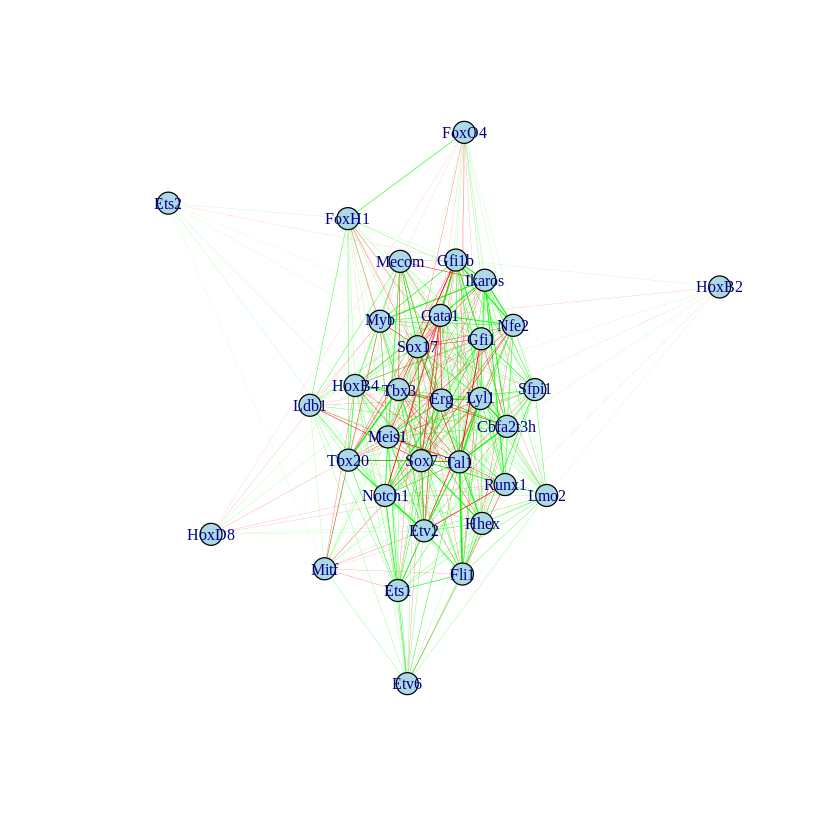

In [138]:
# Seuil pour filtrer les arêtes
threshold <- 0.01

# Créer un graphe
edges <- which(abs(pc_matrix) > threshold & upper.tri(pc_matrix), arr.ind = TRUE)
edge_list <- data.frame(
  from = rownames(pc_matrix)[edges[,1]],
  to = colnames(pc_matrix)[edges[,2]],
  weight = pc_matrix[edges]
)

g <- graph_from_data_frame(edge_list, directed = FALSE)

# Visualisation personnalisée
plot(g,
     vertex.size = 8,
     vertex.label.cex = 0.8,
     vertex.color = "lightblue",
     edge.width = abs(E(g)$weight)*5,  # largeur proportionnelle à l'intensité
     edge.color = ifelse(E(g)$weight > 0, "green", "red"),  # positive=green, negative=red
     layout = layout_with_fr(g, weights = abs(E(g)$weight))) # Use absolute weights for layout

In [139]:
plot_partial_corr_network <- function(pc_matrix, threshold = 0.01) {
  # Créer la liste des arêtes au-dessus du seuil
  edges <- which(abs(pc_matrix) > threshold & upper.tri(pc_matrix), arr.ind = TRUE)

  # Si aucune arête ne dépasse le seuil, avertir et créer un graphe vide
  if(nrow(edges) == 0) {
    cat("Aucune arête ne dépasse le seuil choisi. Diminuez le threshold.\n")
    g <- graph_from_data_frame(data.frame(from=character(0), to=character(0), weight=numeric(0)),
                               vertices = colnames(pc_matrix),
                               directed = FALSE)
  } else {
    edge_list <- data.frame(
      from = rownames(pc_matrix)[edges[,1]],
      to = colnames(pc_matrix)[edges[,2]],
      weight = pc_matrix[edges]
    )
    g <- graph_from_data_frame(edge_list, directed = FALSE)
  }

  # Layout du graphe
  layout <- layout_with_fr(g, weights = if(ecount(g)>0) abs(E(g)$weight) else NULL)

  # Tracé du graphe
  plot(g,
       vertex.size = 8,
       vertex.label.cex = 0.8,
       vertex.color = "lightblue",
       edge.width = if(ecount(g)>0) abs(E(g)$weight)*5 else 0,
       edge.color = if(ecount(g)>0) ifelse(E(g)$weight > 0, "green", "red") else NA,
       layout = layout)

  return(g)  # retourne le graphe pour analyses supplémentaires si besoin
}

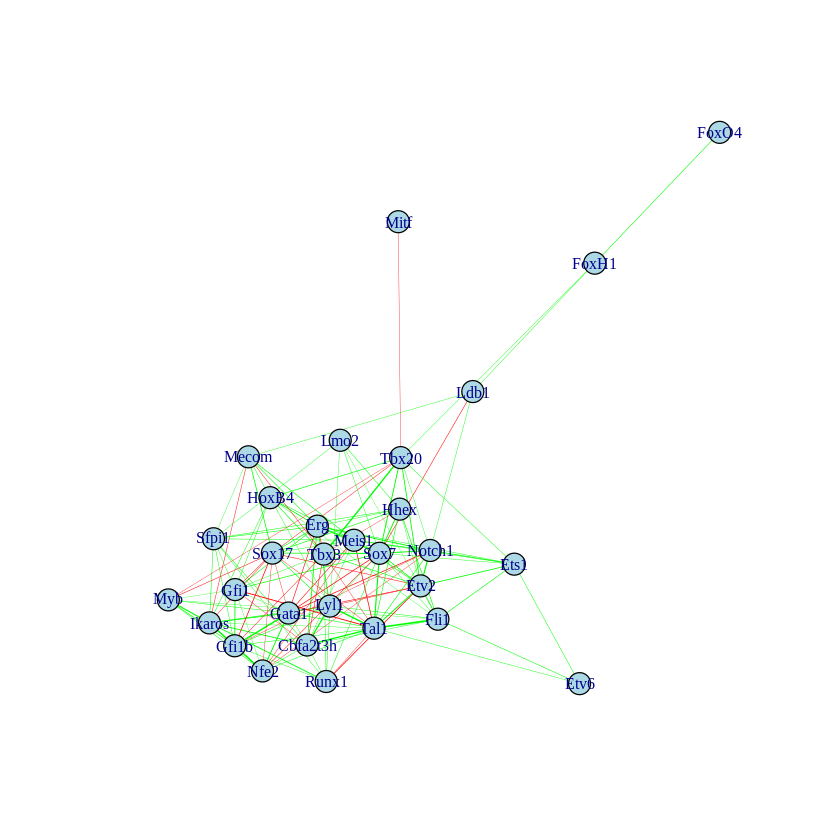

In [140]:
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.05)

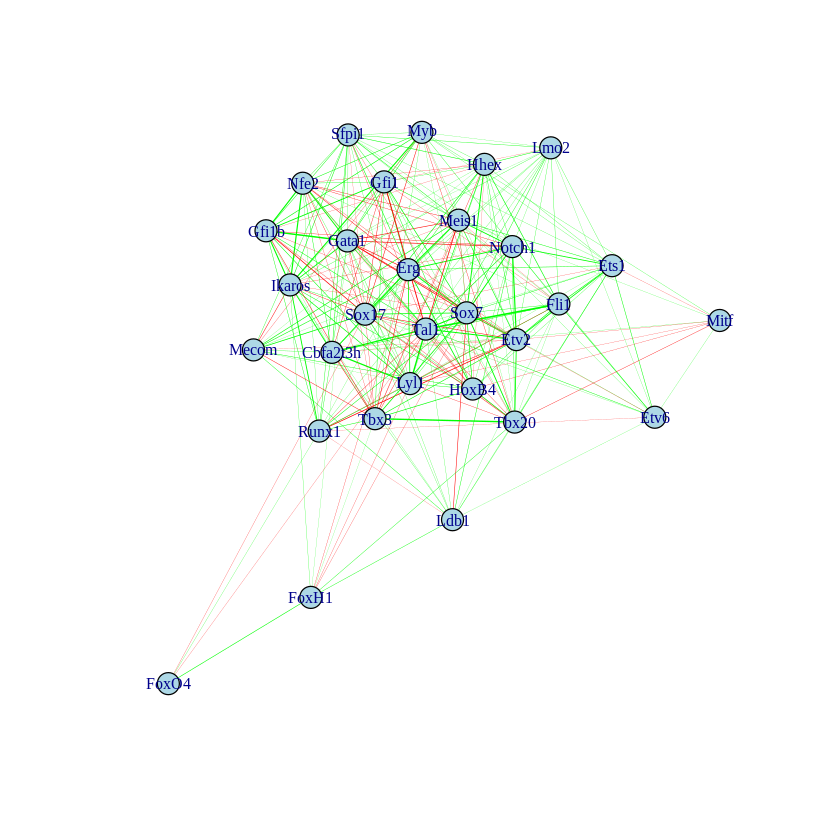

In [141]:
# Exemple d'utilisation
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.025)

# Seuil fixe : 0.01
# On fait varier lambda

In [147]:
# Fonction pour calculer la matrice de corrélation partielle avec régularisation
compute_partial_corr <- function(X, lambda = 0.01) {
  # Calcul de la covariance
  cov_mat <- cov(X)

  # Régularisation de la covariance
  cov_matrix_reg <- cov_mat + lambda * diag(ncol(cov_mat))

  # Vérification du déterminant
  if(det(cov_matrix_reg) == 0) {
    warning("La matrice régularisée est singulière. Essayez un lambda plus grand.")
  }

  # Inversion de la covariance
  precision_matrix <- solve(cov_matrix_reg)

  # Calcul de la corrélation partielle
  d <- sqrt(diag(precision_matrix))
  pc_matrix <- -precision_matrix / (d %o% d)
  diag(pc_matrix) <- 1

  return(pc_matrix)
}


In [150]:
lambda_test <- 0.01
pc_matrix <- compute_partial_corr(X, lambda = lambda_test)

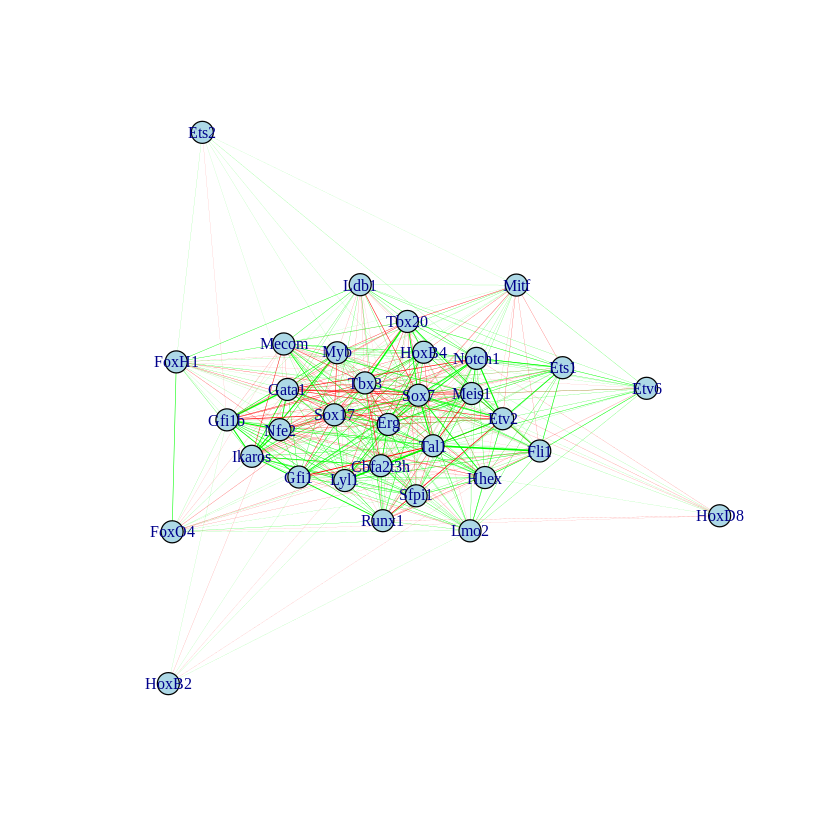

In [151]:
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.01)

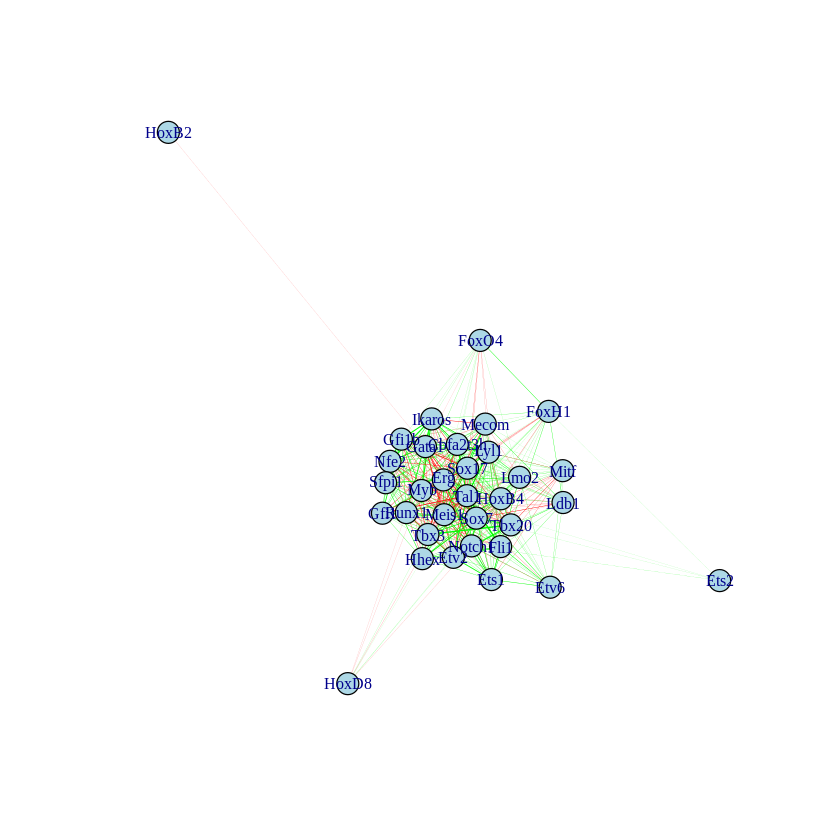

In [154]:
lambda_test <- 0.02
pc_matrix <- compute_partial_corr(X, lambda = lambda_test)
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.01)

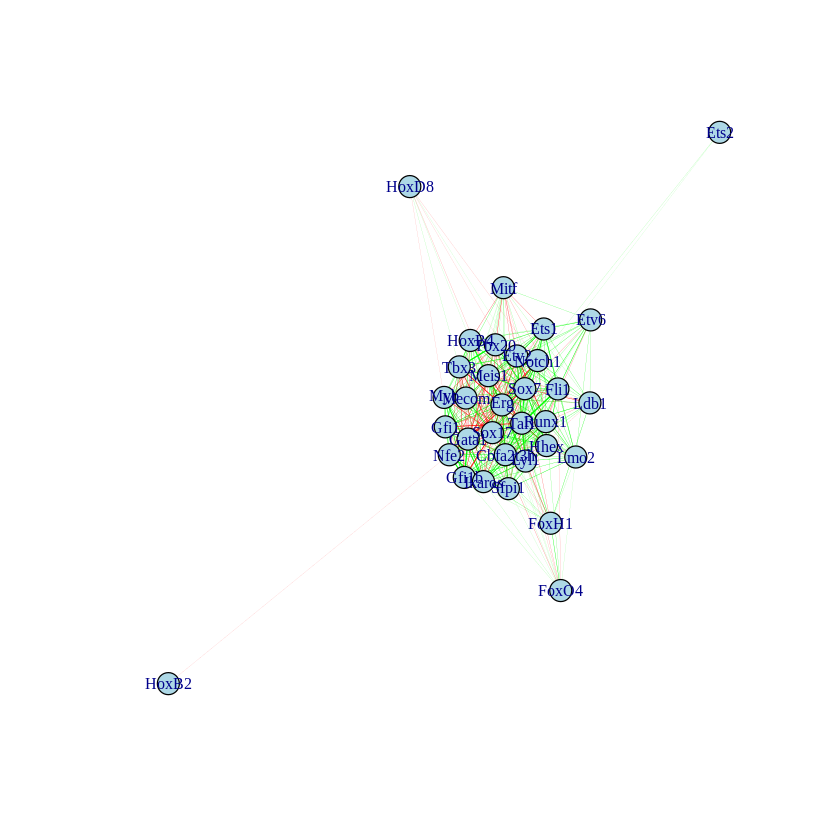

In [156]:
lambda_test <- 0.025
pc_matrix <- compute_partial_corr(X, lambda = lambda_test)
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.01)

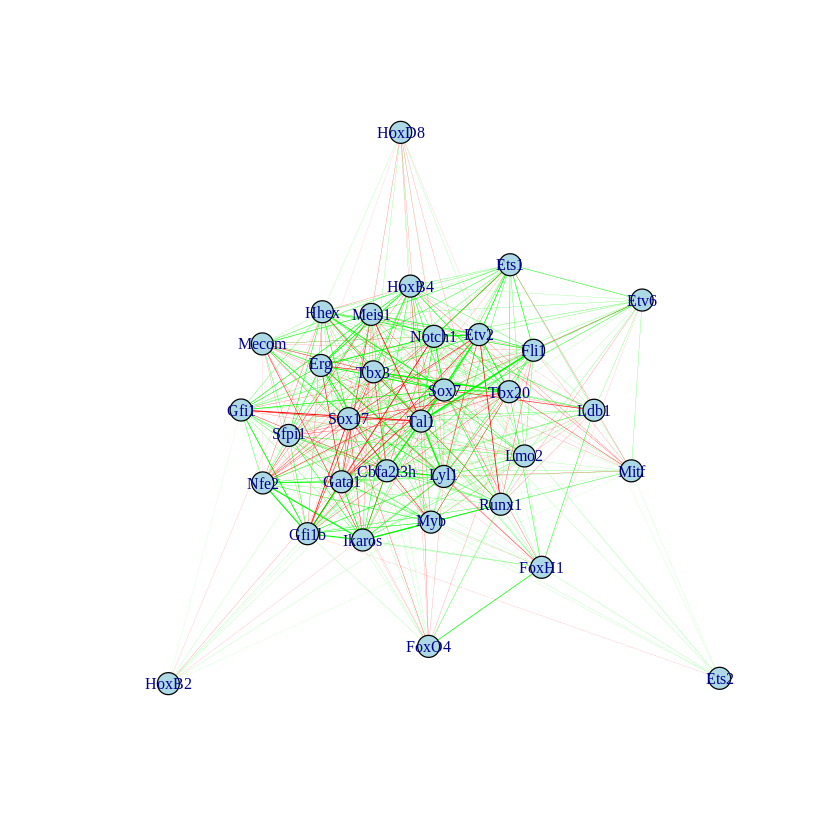

In [157]:
lambda_test <- 0.005
pc_matrix <- compute_partial_corr(X, lambda = lambda_test)
g_pcor <- plot_partial_corr_network(pc_matrix, threshold = 0.01)

# Comparaison des résultats

# Lambda fixe

    Lorsque le lambda est maintenu fixe, on a constaté que le seuil des reconstruction qui reflète la réalité biologique et qui d'approche le graphe de `Verny et al` est le `thresold=0.05`.
    En effet, les autres seuils soit condensent de trop le voisinage ou soit ont tendance à créer des cellules isolées.


# Seuil fixe
    Lors de la variation du lambda, on avait constaté la meilleure valeur ( approximatif) du seuil.
    Nous avons donc maintenu celle valeur (0.05) pour ensuite faire varier le lambda.
    On y retrouve la même combinaison qui arrive à donner le meilleur résultat.